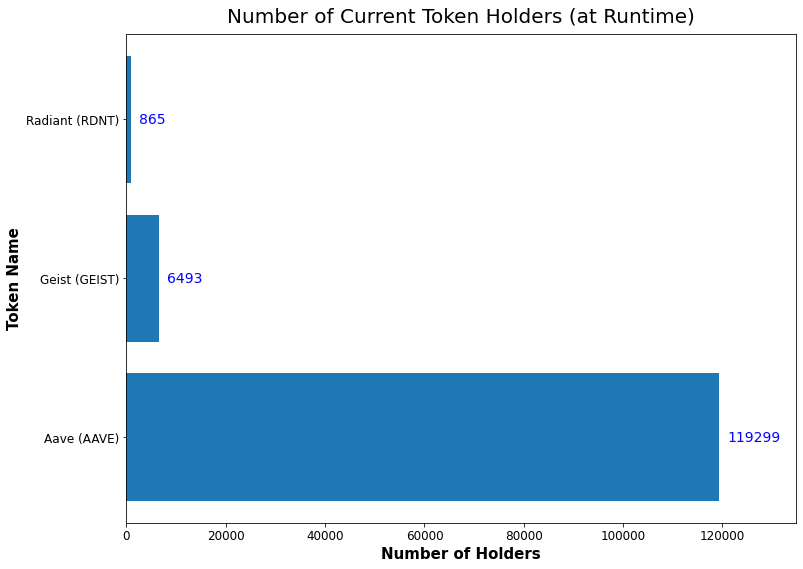

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## Plot the number of holders for each token

# Blockhain explorer URLs
aave_token_url = 'https://etherscan.io/token/0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9#balances'
geist_token_url = 'https://ftmscan.com/token/0xd8321aa83fb0a4ecd6348d4577431310a6e0814d#balances'
radiant_token_url = 'https://arbiscan.io/token/0x0c4681e6c0235179ec3d4f4fc4df3d14fdd96017#balances'

# Get the HTML for each token
# Note: Requests to Etherscan will fail if the User-Agent header is missing
aave_token_html = BeautifulSoup(requests.get(aave_token_url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, '
                               'like Gecko) Chrome/50.0.2661.102 Safari/537.36'}).text, 'html.parser')
geist_token_html = BeautifulSoup(requests.get(geist_token_url).text, 'html.parser')
radiant_token_html = BeautifulSoup(requests.get(radiant_token_url).text, 'html.parser')

# Scrape the number of holders from the html
aave_number_of_holders = int(aave_token_html.find(id="ContentPlaceHolder1_tr_tokenHolders").find('div', {'class': 'mr-3'}).text.split(' ')[0].split('\n')[1].replace(',',''))
geist_number_of_holders = int(geist_token_html.find(id="ContentPlaceHolder1_tr_tokenHolders").find('div', {'class': 'col-md-8'}).text.split(' ')[0].split('\n')[1].replace(',',''))
radiant_number_of_holders = int(radiant_token_html.find(id="ContentPlaceHolder1_tr_tokenHolders").find('div', {'class': 'mr-3'}).text.split(' ')[36])
    
# Create a dictionary to store the number of holders 
number_of_holders = {
    'Aave': aave_number_of_holders,
    'Geist': geist_number_of_holders,
    'Radiant': radiant_number_of_holders
}

token_names = {
    'Aave': 'Aave (AAVE)',
    'Geist': 'Geist (GEIST)',
    'Radiant': 'Radiant (RDNT)'
}

# Figure Size
fig, ax = plt.subplots(figsize =(12, 9))
 
# Horizontal Bar Plot
bar_container = ax.barh(list(token_names.values()), list(number_of_holders.values()))

# Add Plot Title
ax.set_title(
    'Number of Current Token Holders (at Runtime)',
    fontdict={
        'fontsize': 20
    },
    loc='center',
    pad=12
)

# Label Axes
plt.xlabel('Number of Holders', fontweight ='bold', fontsize = 15)
plt.ylabel('Token Name', fontweight ='bold', fontsize = 15)

# Set Tick Size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add Bar Labels
plt.bar_label(bar_container, padding=8, color='b', fontsize=14)

# Add Padding on X Axis to Make Room for Bar Labels 
plt.axis(xmax=max([aave_number_of_holders, geist_number_of_holders, radiant_number_of_holders])*1.13)

# Show Plot
plt.show()

# Use matplotlib to display the data
# plt.bar(list(number_of_holders.keys()), list(number_of_holders.values()))

In [ ]:
aave_holders_raw = pd.read_csv('aave-token-holders.csv')
geist_holders_raw = pd.read_csv('geist-token-holders.csv')
radiant_holders_raw = pd.read_csv('radiant-token-holders.csv')

# Clean Data (Part I)
# Remove rows with the zero address
aave_holders_first_clean = aave_holders_raw[aave_holders_raw['HolderAddress'] != '0x0000000000000000000000000000000000000000']
geist_holders_first_clean = geist_holders_raw[geist_holders_raw['HolderAddress'] != '0x0000000000000000000000000000000000000000']
radiant_holders_first_clean = radiant_holders_raw[radiant_holders_raw['HolderAddress'] != '0x0000000000000000000000000000000000000000']

# Clean Data (Part II)
# Remove rows with zero balance
aave_holders = aave_holders_first_clean[aave_holders_first_clean['Balance'] != 0]
geist_holders = geist_holders_first_clean[geist_holders_first_clean['Balance'] != 0]
radiant_holders = radiant_holders_first_clean[radiant_holders_first_clean['Balance'] != 0]